In [1]:
import pandas as pd
import re
import numpy as np

import matplotlib.pyplot as plt

Duplicate key in file PosixPath('/home/mglee/.conda/envs/svmglee/lib/python3.8/site-packages/matplotlib/mpl-data/matplotlibrc'), line 257 ('font.family:  NanumGothic')


In [13]:
pd.options.display.float_format = '{:.5f}'.format

In [2]:
t_data = pd.read_csv("../data/1theK (원더케이)_total_12m_0725.csv", lineterminator="\n")

In [3]:
t_data.head()

,Unnamed: 0,videoid,comment,comment_id,comment_time,child_reply,like,parent,title,channelname,time,view,video_like,commentcnt
0,0,2anE5ekyQKY,It was my birthday and I literally listened to...,UgxCyzyv8d8NeVvhilt4AaABAg,2022-07-25T06:02:51Z,0,0,Parent,[MV] SECRET NUMBER(시크릿넘버) _ Fire Saturday(불토),1theK (원더케이),2021-10-27T09:00:01Z,9243860,575152,264507
1,1,2anE5ekyQKY,Tariannya terngiang-ngiaang jugaa.. lagunya no...,UgxU_vgykWd64KMLWw94AaABAg,2022-07-25T05:42:06Z,0,0,Parent,[MV] SECRET NUMBER(시크릿넘버) _ Fire Saturday(불토),1theK (원더케이),2021-10-27T09:00:01Z,9243860,575152,264507
2,2,2anE5ekyQKY,~♥~♥~♥~,Ugw9Shqd6Yb8wb-bIRF4AaABAg,2022-07-25T03:12:13Z,0,1,Parent,[MV] SECRET NUMBER(시크릿넘버) _ Fire Saturday(불토),1theK (원더케이),2021-10-27T09:00:01Z,9243860,575152,264507
3,3,2anE5ekyQKY,9.243,UgzRu3mSw8S13hqESdV4AaABAg,2022-07-25T03:04:15Z,0,0,Parent,[MV] SECRET NUMBER(시크릿넘버) _ Fire Saturday(불토),1theK (원더케이),2021-10-27T09:00:01Z,9243860,575152,264507
4,4,2anE5ekyQKY,3,UgzujC6Zb3oQxDIfOnp4AaABAg,2022-07-25T02:35:28Z,0,1,Parent,[MV] SECRET NUMBER(시크릿넘버) _ Fire Saturday(불토),1theK (원더케이),2021-10-27T09:00:01Z,9243860,575152,264507


In [4]:
data = t_data.iloc[:,1:]
data

,videoid,comment,comment_id,comment_time,child_reply,like,parent,title,channelname,time,view,video_like,commentcnt
0,2anE5ekyQKY,It was my birthday and I literally listened to...,UgxCyzyv8d8NeVvhilt4AaABAg,2022-07-25T06:02:51Z,0,0,Parent,[MV] SECRET NUMBER(시크릿넘버) _ Fire Saturday(불토),1theK (원더케이),2021-10-27T09:00:01Z,9243860,575152,264507
1,2anE5ekyQKY,Tariannya terngiang-ngiaang jugaa.. lagunya no...,UgxU_vgykWd64KMLWw94AaABAg,2022-07-25T05:42:06Z,0,0,Parent,[MV] SECRET NUMBER(시크릿넘버) _ Fire Saturday(불토),1theK (원더케이),2021-10-27T09:00:01Z,9243860,575152,264507
2,2anE5ekyQKY,~♥~♥~♥~,Ugw9Shqd6Yb8wb-bIRF4AaABAg,2022-07-25T03:12:13Z,0,1,Parent,[MV] SECRET NUMBER(시크릿넘버) _ Fire Saturday(불토),1theK (원더케이),2021-10-27T09:00:01Z,9243860,575152,264507
3,2anE5ekyQKY,9.243,UgzRu3mSw8S13hqESdV4AaABAg,2022-07-25T03:04:15Z,0,0,Parent,[MV] SECRET NUMBER(시크릿넘버) _ Fire Saturday(불토),1theK (원더케이),2021-10-27T09:00:01Z,9243860,575152,264507
4,2anE5ekyQKY,3,UgzujC6Zb3oQxDIfOnp4AaABAg,2022-07-25T02:35:28Z,0,1,Parent,[MV] SECRET NUMBER(시크릿넘버) _ Fire Saturday(불토),1theK (원더케이),2021-10-27T09:00:01Z,9243860,575152,264507
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1258527,ljdwsoYTq7I,Haha maaf bukan lu ke tiga,UgzGSabjmZOxzGcP4W94AaABAg.9FcweDhh5s19FcxIgYLZ3y,2020-11-04T09:06:05Z,0,0,UgzGSabjmZOxzGcP4W94AaABAg,[MV] SECRET NUMBER(시크릿넘버) _ Got That Boom,1theK (원더케이),2020-11-04T09:00:14Z,22432687,1060375,537739
1258528,ljdwsoYTq7I,Wow..,UgzGSabjmZOxzGcP4W94AaABAg.9FcweDhh5s19FcwjquN5uD,2020-11-04T09:01:11Z,0,0,UgzGSabjmZOxzGcP4W94AaABAg,[MV] SECRET NUMBER(시크릿넘버) _ Got That Boom,1theK (원더케이),2020-11-04T09:00:14Z,22432687,1060375,537739
1258529,ljdwsoYTq7I,Omg,UgwwCLc4B_TJT_qr_sV4AaABAg,2020-11-04T09:00:24Z,2,3,Parent,[MV] SECRET NUMBER(시크릿넘버) _ Got That Boom,1theK (원더케이),2020-11-04T09:00:14Z,22432687,1060375,537739
1258530,ljdwsoYTq7I,OMG UR FIRST,UgwwCLc4B_TJT_qr_sV4AaABAg.9Fcwe1rYP8B9FdUKHCpbcd,2020-11-04T14:03:24Z,0,1,UgwwCLc4B_TJT_qr_sV4AaABAg,[MV] SECRET NUMBER(시크릿넘버) _ Got That Boom,1theK (원더케이),2020-11-04T09:00:14Z,22432687,1060375,537739


In [6]:
from datetime import datetime
from time import strptime

data['comment_time'] = data['comment_time'].apply(lambda x : datetime.strptime(x, '%Y-%m-%dT%H:%M:%SZ'))
data['comment_ymd'] = data['comment_time'].apply(lambda x : datetime.strftime(x, '%y/%m/%d'))

TypeError: strptime() argument 1 must be str, not Timestamp

In [7]:
data['comment_ymd']

0          22/07/25
1          22/07/25
2          22/07/25
3          22/07/25
4          22/07/25
             ...   
1258527    20/11/04
1258528    20/11/04
1258529    20/11/04
1258530    20/11/04
1258531    20/11/04
Name: comment_ymd, Length: 1258532, dtype: object

In [8]:
lst = []
title = []
for item in data.groupby('title'):
    title.append(item[0])
    timeline = pd.DataFrame(item[1]).groupby(['comment_ymd']).count().iloc[:,0]
    lst.append(timeline)


In [9]:
parameters = {'xtick.labelsize': 5,
          'axes.titlesize': 50,
          'figure.figsize' : (150, 50),
          'figure.dpi' : 200
          }
plt.rcParams.update(parameters)

for idx, item in enumerate(lst):
    temp = lst[idx]
    temp = temp[:int(len(temp) / 2)]
    plt.subplot(5, 1, idx + 1)
    plt.plot(temp)
    plt.title(title[idx])


In [ ]:

# plt.subplot(5, 1, 1)
# plt.plot(lst[0])
# #plt.grid()
# plt.xticks(lst[0].index)
# plt.tick_params(axis = 'x', pad = 10)
# plt.title('IU(아이유) _ Celebrity')
# plt.subplot(5, 1, 2)
# plt.plot(lst[1])
# #plt.grid()
# plt.xticks(lst[1].index)
# plt.tick_params(axis = 'x', pad = 5)
# plt.title('SECRET NUMBER(시크릿넘버) _ Fire Saturday(불토)')
# plt.subplot(5, 1, 3)
# plt.plot(lst[2])
# #plt.grid()
# plt.title('SECRET NUMBER(시크릿넘버) _ Got That Boom')
# plt.subplot(5, 1, 4)
# plt.plot(lst[3])
# #plt.grid()
# plt.title('Weeekly(위클리) _ After School')
# plt.subplot(5, 1, 5)
# plt.plot(lst[4])
# #plt.grid()
# plt.title('eAeon(이이언) _ Don&#39;t(그러지 마)(feat. RM)')

plt.show()

In [15]:
data['like'].describe()

count   1258532.00000
mean          8.50058
std         144.34042
min           0.00000
25%           0.00000
50%           1.00000
75%           4.00000
max       71893.00000
Name: like, dtype: float64

In [9]:
data['좋아요 개수'].value_counts().sort_index()

0.0         653
1.0         793
2.0         863
3.0         380
4.0         192
           ... 
130000.0      2
150000.0      1
160000.0      1
190000.0      1
320000.0      1
Name: 좋아요 개수, Length: 720, dtype: int64

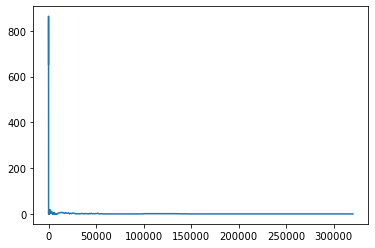

In [10]:
plt.plot(data['좋아요 개수'].value_counts().sort_index())
plt.show()

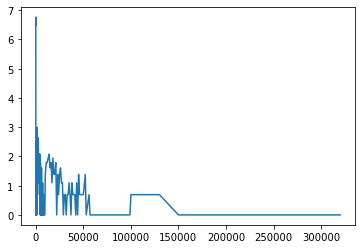

In [11]:
plt.plot(np.log(data['좋아요 개수'].value_counts().sort_index()))
plt.show()

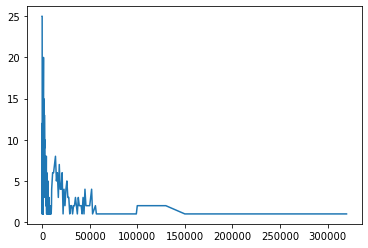

In [12]:
plt.plot(data['좋아요 개수'].value_counts().sort_index()[10:])
plt.show()